# Mathematische Modellierung von Zeitreihen

### Random Walk

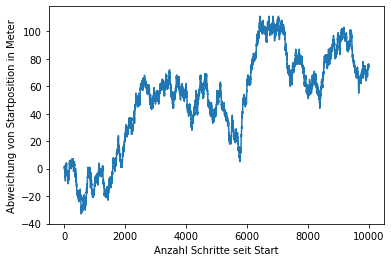

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
d = np.random.choice(a=[-1,1], size=10000, replace=True)
x = np.cumsum(d)
plt.plot(x)
plt.xlabel("Anzahl Schritte seit Start")
plt.ylabel("Abweichung von Startposition in Meter")
plt.show()

### Random Walk mit Drift

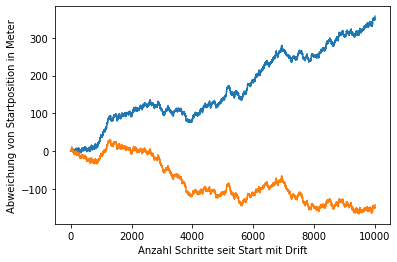

In [3]:
np.random.seed(35)
d = np.random.choice(a=[-1,1], size=10000, replace=True)
delta = 5*10**(-2)
x = np.cumsum(d)
y = np.zeros(10000)
for i in range(1,10000):
    y[i] = delta+y[i-1]+d[i]
plt.plot(y)
plt.plot(x)
plt.xlabel("Anzahl Schritte seit Start mit Drift")
plt.ylabel("Abweichung von Startposition in Meter")
plt.show()

### Weisses Rauschen

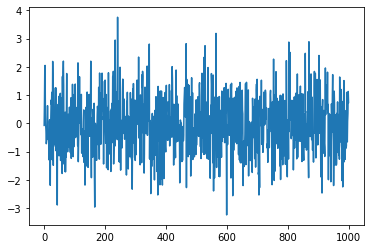

In [5]:
w = np.random.normal(size = 1000)
plt.plot(w)
plt.show()

### Moving Average Prozess

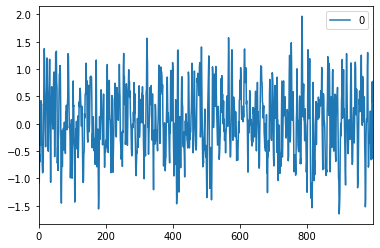

In [6]:
from pandas import Series, DataFrame
w = DataFrame(np.random.normal(size=1000))
w.rolling(window=3).mean().plot()
plt.show()

### Autoregressiver Prozess

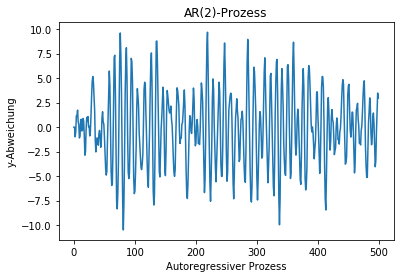

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(35)
d = np.random.choice(a=[-1,1], size=500, replace=True)
y = np.zeros(500)
for i in range(2,500):
    y[i] = 1.5*y[i-1]-0.9*y[i-2]+d[i]
plt.plot(y)
plt.xlabel("Autoregressiver Prozess")
plt.ylabel("y-Abweichung")
plt.title("AR(2)-Prozess")
plt.show()

# Beispiel Autokorrelationsfunktion

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_table("wave.dat")
print(df.head())

   waveht
0     367
1     407
2    -255
3    -515
4    -500


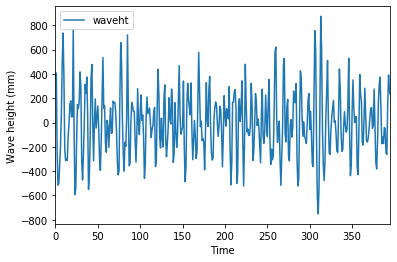

In [8]:
%matplotlib inline

df.plot()

plt.xlabel("Time")
plt.ylabel("Wave height (mm)")

plt.show()

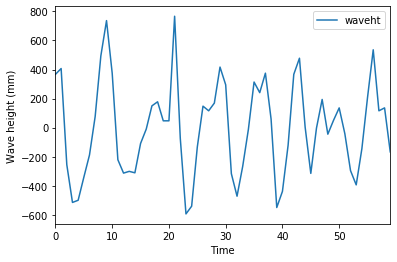

In [13]:
df.loc[0:59,:].plot()

plt.xlabel("Time")
plt.ylabel("Wave height (mm)")


plt.show()

In [12]:
from statsmodels.tsa.stattools import acf 

acf(df["waveht"])[1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


0.4702563961883794

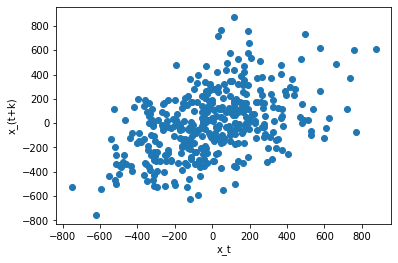

In [14]:
from pandas.plotting import lag_plot
lag_plot(df,1)

plt.xlabel("x_t")
plt.ylabel("x_(t+k)")

plt.show()

In [15]:
acf(df["waveht"])[[2,3,5,10]]
print(acf(df["waveht"])[[2,3,5,10]])

[-0.26291153 -0.49891702 -0.21499293 -0.07431329]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


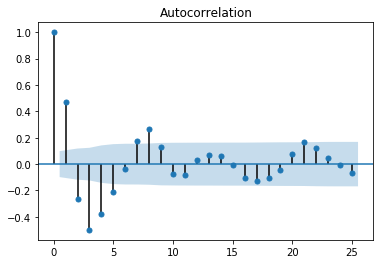

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=25)

plt.show()